# Long COVID coding in primary care.

This OpenSAFELY report is a routine update of our peer-review paper published in the _British Journal of General Practice_ on the [Clinical coding of long COVID in English primary care: a federated analysis of 58 million patient records in situ using OpenSAFELY](https://doi.org/10.3399/BJGP.2021.0301). 

It is a routine update of the analysis described in the paper. The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussionis and the full analytical methods on this routine report are [available on GitHub](https://github.com/opensafely/long-covid).

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. You can read more about [OpenSAFELY on our website](https://github.com/opensafely/long-covid).

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import pandas as pd
pd.set_option("display.max_rows", 200)
pd.options.display.float_format = "{:,.1f}".format
float_formatter = "{:,.0f}".format
import lib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
tpp = lib.tpp_emis_table_format("output", {"0": "Missing"})
total_tpp = tpp.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_tpp = total_tpp.sum()
emis = lib.tpp_emis_table_format("emis", {"RGN11NM": "region","0": "Missing","6": "Missing"})
total_emis = emis.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_emis = total_emis.sum()
totals = tpp[["No long COVID", "Long COVID"]] + emis[["No long COVID", "Long COVID"]]

#display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

## Results

### Counts and rates of long COVID coding stratified by demographic variable
This is equivalent to Table 2 from [the paper](https://doi.org/10.3399/BJGP.2021.0301)

In [4]:
total, table_2 = lib.get_table_2([tpp, emis, totals])
display(Markdown(f"There were {float_formatter(total[('Totals','Long COVID')])} people who have been given a diagnostic code for long COVID to date. Counts for each software system are:"))
print(total.loc[(slice(None), "Long COVID")])
display(Markdown(f"The overall rate of long COVID coding in the population was {round(total[('Totals','Rate per 100,000')]/2,1)} per 100,000 people. Rates for each software system are:"))
print(total.loc[(slice(None), "Rate per 100,000")]/2)
table_2

There were 57,100 people who have been given a diagnostic code for long COVID to date. Counts for each software system are:

TPP      15,227.0
EMIS     41,873.0
Totals   57,100.0
dtype: float64


The overall rate of long COVID coding in the population was 99.6 per 100,000 people. Rates for each software system are:

TPP       63.1
EMIS     126.0
Totals    99.6
dtype: float64


TPP                        \
                                   Long COVID Rate per 100,000    %   
age_group 0-17                            397              8.2  2.6   
          18-24                           924             48.4  6.1   
          25-34                          2011             60.0 13.2   
          35-44                          3104             96.0 20.4   
          45-54                          3931            121.0 25.8   
          55-69                          3914             92.6 25.7   
          70-79                           706             33.7  4.6   
          80+                             240             19.6  1.6   
sex       F                              9638             79.9 63.3   
          M                              5589             46.3 36.7   
region    East of England                2677             47.2 17.6   
          East Midlands                  2717             64.8 17.8   
          London                          873             51.3  5.7   
          North East                      861             76.2  5.7   
          North West                     1173             56.5  7.7   
          South East                     1622            100.9 10.7   
          South West                     1951             58.9 12.8   
          West Midlands                   605             61.0  4.0   
          Yorkshire and The Humber       2743             79.6 18.0   
imd       Missing                         351             59.6  2.3   
          Most deprived 1                2828             58.5 18.6   
          2                              2960             62.6 19.4   
          3                              3229             64.8 21.2   
          4                              3049             65.1 20.0   
          Least deprived 5               2810             65.1 18.5   
ethnicity Missing                        3443             51.8 22.6   
          White                          9855             67.2 64.7   
          Mixed                           181             56.5  1.2   
          South Asian                    1271             84.6  8.3   
          Black                           275             53.3  1.8   
          Other                           202             42.4  1.3   

                                         EMIS                        \
                                   Long COVID Rate per 100,000    %   
age_group 0-17                           1152             17.0  2.8   
          18-24                          2287             82.4  5.5   
          25-34                          5892            123.2 14.1   
          35-44                          9102            196.3 21.7   
          45-54                         10833            242.4 25.9   
          55-69                         10393            185.4 24.8   
          70-79                          1677             63.1  4.0   
          80+                             537             34.4  1.3   
sex       F                             26462            159.3 63.2   
          M                             15411             92.6 36.8   
region    East of England                1138             87.5  2.7   
          East Midlands                   661             88.0  1.6   
          London                        10332            136.1 24.7   
          North East                     1646            141.2  3.9   
          North West                    10517            156.1 25.1   
          South East                     7056            100.3 16.9   
          South West                     2413             99.3  5.8   
          West Midlands                  6740            135.9 16.1   
          Yorkshire and The Humber       1302            106.9  3.1   
imd       Missing                         145            123.4  0.3   
          Most deprived 1                9854            143.8 23.5   
          2                              9843            139.4 23

### Volume of code use in individual practices
Stratified by the electronic health record provider of the practice (TPP/SystmOne or EMIS).

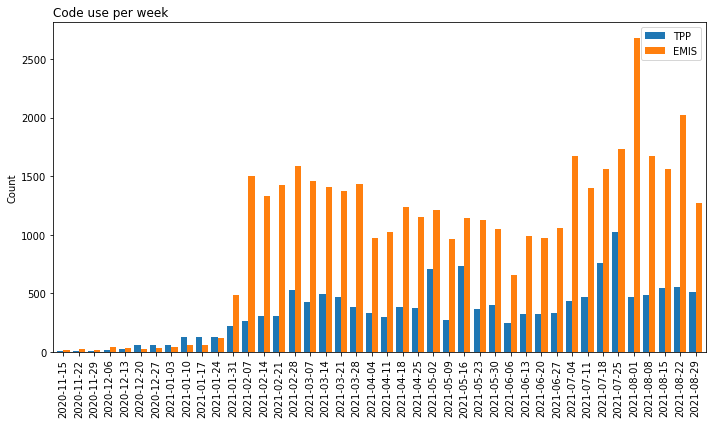

In [5]:
lib.code_use_per_week_graph()

### Use of long COVID codes over time
Stratified by the electronic health record provider of the practice (TPP/SystmOne or EMIS). Reporting lag may affect recent dates.

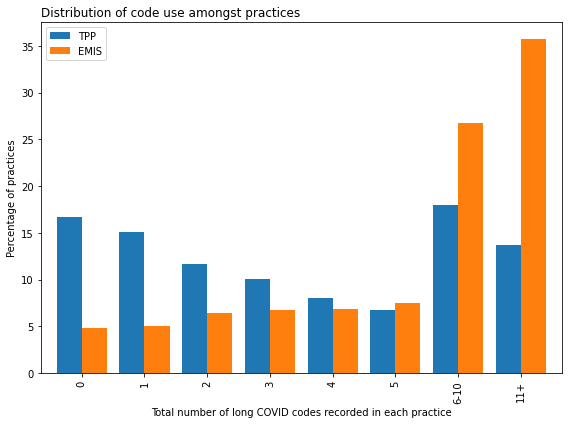

In [6]:
lib.practice_distribution_graph()

### Total use of each individual long COVID related code
This is distinct from the above table in that it counts all coded events, including where patients have been coded more than once.

In [7]:
total, codes_tpp = lib.smoosh_codes_tables()
total = total[(slice(None), "Total records")]
pd.set_option('display.max_colwidth', 200)
display(Markdown(f"There were {float_formatter(total['Total'])} long COVID codes used in total. Counts for each software system were:"))
print(total)
codes_tpp

There were 100,241 long COVID codes used in total. Counts for each software system were:

TPP      22,705.0
EMIS     77,644.0
Total   100,241.0
dtype: float64


\
                                                                                                   term   
code                                                                                                      
1325161000000102                                                                 Post-COVID-19 syndrome   
1325181000000106  Ongoing symptomatic disease caused by severe acute respiratory syndrome coronavirus 2   
1325021000000106                                                     Signposting to Your COVID Recovery   
1325031000000108                                               Referral to post-COVID assessment clinic   
1325041000000104                                Referral to Your COVID Recovery rehabilitation platform   
1325051000000101                        Newcastle post-COVID syndrome Follow-up Screening Questionnaire   
1325061000000103       Assessment using Newcastle post-COVID syndrome Follow-up Screening Questionnaire   
1325071000000105                                       COVID-19 Yorkshire Rehabilitation Screening tool   
1325081000000107                      Assessment using COVID-19 Yorkshire Rehabilitation Screening tool   
1325091000000109                              Post-COVID-19 Functional Status Scale patient self-report   
1325101000000101             Assessment using Post-COVID-19 Functional Status Scale patient self-report   
1325121000000105            Post-COVID-19 Functional Status Scale patient self-report final scale grade   
1325131000000107           Post-COVID-19 Functional Status Scale structured interview final scale grade   
1325141000000103            Assessment using Post-COVID-19 Functional Status Scale structured interview   
1325151000000100                             Post-COVID-19 Functional Status Scale structured interview   

                           TPP               EMIS              Total       
                 Total records    % Total records    % Total records    %  
code                                                                       
1325161000000102       4,295.0 18.9      56,598.0 72.9      60,893.0 60.7  
1325181000000106       3,526.0 15.5       6,428.0  8.3       9,954.0  9.9  
1325021000000106       4,326.0 19.1       3,658.0  4.7       7,984.0  8.0  
1325031000000108       5,508.0 24.3       8,366.0 10.8      13,874.0 13.8  
1325041000000104       4,115.0 18.1         965.0  1.2       5,080.0  5.1  
1325051000000101          36.0  0.2         599.0  0.8         635.0  0.6  
1325061000000103          41.0  0.2         346.0  0.4         387.0  0.4  
1325071000000105         271.0  1.2         297.0  0.4         568.0  0.6  
1325081000000107         543.0  2.4         177.0  0.2         720.0  0.7  
1325091000000109           6.0  0.0          37.0  0.0          43.0  0.0  
1325101000000101           NaN  NaN          89.0  0.1           NaN  NaN  
1325121000000105           NaN  NaN          19.0  0.0           NaN  NaN  
1325131000000107           0.0  0.0           6.0  0.0           6.0  0.0  
1325141000000103          32.0  0.1          36.0  0.0          68.0  0.1  
1325151000000100           6.0  0.0          23.0  0.0          29.0  0.0

### Characteristics of the cohort
This is equivalent to Table 1 in [the paper](https://doi.org/10.3399/BJGP.2021.0301)

In [8]:
total, table_1 = lib.get_table_1([tpp, emis, totals])
display(Markdown(f"There were {float_formatter(total[('Totals','Patient count')])} people in the cohort in total. In practices that use TPP software, there were {float_formatter(total[('TPP','Patient count')])}, while in practices that use EMIS software, there were {float_formatter(total[('EMIS','Patient count')])} people."))
display(table_1)

There were 57,386,436 people in the cohort in total. In practices that use TPP software, there were 24,135,847, while in practices that use EMIS software, there were 33,250,589 people.

TPP               EMIS       \
                                   Patient count    % Patient count    %   
age_group 0-17                           4845926 20.1       6763374 20.3   
          18-24                          1909531  7.9       2774065  8.3   
          25-34                          3352407 13.9       4782922 14.4   
          35-44                          3234539 13.4       4636335 13.9   
          45-54                          3248911 13.5       4468675 13.4   
          55-69                          4228098 17.5       5605840 16.9   
          70-79                          2094836  8.7       2658387  8.0   
          80+                            1221599  5.1       1560991  4.7   
sex       F                             12067467 50.0      16610913 50.0   
          M                             12068380 50.0      16639676 50.0   
region    East of England                5667724 23.5       1300151  3.9   
          East Midlands                  4192354 17.4        751112  2.3   
          London                         1701424  7.1       7591334 22.8   
          North East                     1129913  4.7       1166122  3.5   
          North West                     2075934  8.6       6739187 20.3   
          South East                     1606811  6.7       7034051 21.2   
          South West                     3311902 13.7       2430307  7.3   
          West Midlands                   992568  4.1       4959297 14.9   
          Yorkshire and The Humber       3448044 14.3       1218234  3.7   
imd       Missing                         588668  2.4        117473  0.4   
          Most deprived 1                4833444 20.0       6852326 20.6   
          2                              4725935 19.6       7058459 21.2   
          3                              4983121 20.6       6453336 19.4   
          4                              4686901 19.4       6253825 18.8   
          Least deprived 5               4317778 17.9       6515170 19.6   
ethnicity Missing                        6652486 27.6      10893716 32.8   
          White                         14668443 60.8      17427723 52.4   
          Mixed                           320435  1.3        570855  1.7   
          South Asian                    1501928  6.2       2462184  7.4   
          Black                           516238  2.1       1154510  3.5   
          Other                           476317  2.0        741601  2.2   

                                          Totals       
                                   Patient count    %  
age_group 0-17                          11609300 20.2  
          18-24                          4683596  8.2  
          25-34                          8135329 14.2  
          35-44                          7870874 13.7  
          45-54                          7717586 13.4  
          55-69                          9833938 17.1  
          70-79                          4753223  8.3  
          80+                            2782590  4.8  
sex       F                             28678380 50.0  
          M                             28708056 50.0  
region    East of England                6967875 12.2  
          East Midlands                  4943466  8.6  
          London                         9292758 16.2  
          North East                     2296035  4.0  
          North West                     8815121 15.4  
          South East                     8640862 15.1  
          South West                     5742209 10.0  
          West Midlands                  5951865 10.4  
          Yorkshire and The Humber       4666278  8.1  
imd       Missing                         706141  1.2  
          Most deprived 1               11685770 20.4  
          2                             11784394 20.5  
          3                             11436457 19.9  
          4                             10940726 19.1  
          Least deprived 5              10832948 18.9  
ethnicity Missing       